In [2]:
import pandas as pd
import numpy as np
import datapungi_fed as dpf
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Download Data from FED API

In [40]:
bit = dpf('CBBTCUSD')

In [5]:
bit.head()

,CBBTCUSD
date,
2014-12-01,370.0
2014-12-02,378.0
2014-12-03,378.0
2014-12-04,377.1
2014-12-06,378.0


In [10]:
# the data covers 2012 to current day and daily unjusted prices
bit.index.min(), bit.index.max()

(Timestamp('2014-12-01 00:00:00'), Timestamp('2020-05-02 00:00:00'))

Units:  U.S. Dollars, Not Seasonally Adjusted

Frequency:  Daily, 7-Day

All data is as of 5 PM PST.

Copyright, 2018, Coinbase.

Reproduction of Coinbase data in any form is prohibited except with the prior written permission of Coinbase.
Suggested Citation:

Coinbase, Coinbase Bitcoin [CBBTCUSD], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CBBTCUSD, May 2, 2020.


In [3]:
# bit is a one column data frame
type(bit), bit.shape

(pandas.core.frame.DataFrame, (1946, 1))

(array([735234., 735599., 735964., 736330., 736695., 737060., 737425.]),
 <a list of 7 Text xticklabel objects>)

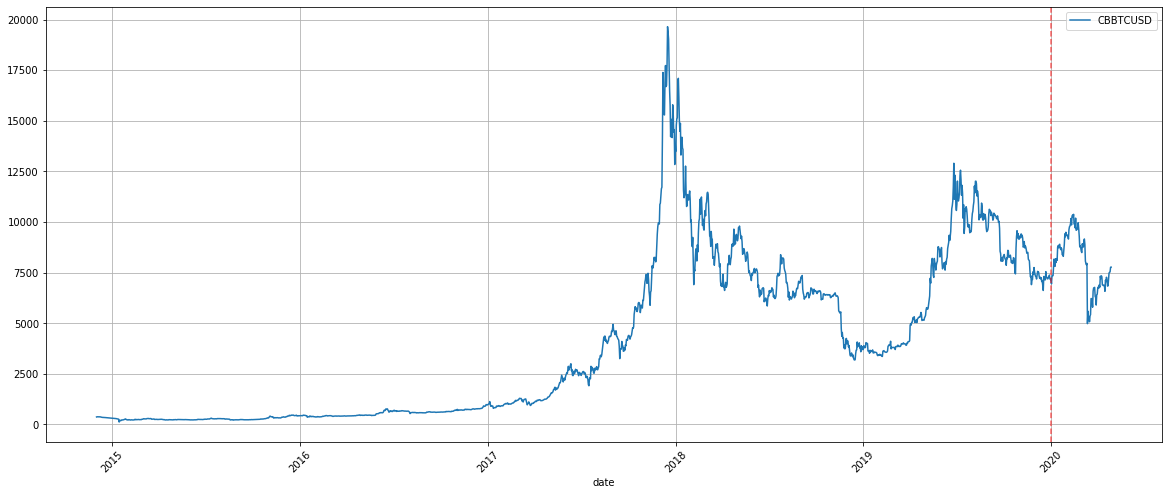

In [45]:
plt.figure(figsize = (20, 8))
sns.lineplot(data = bit)
plt.grid()
plt.axvline('2020-1', alpha = 0.6, linestyle = '--', color = 'r')
plt.xticks(rotation=45)

# The Bitcoin Price USD with other Economic Indicators

## Monthly US Umemployment, Consumer Index, Federal Funds, and More

In [4]:
# monthly unemployment rate
unrate = dpf('UNRATE')

In [5]:
unrate = unrate.loc['2014-12-01':]

In [33]:
unrate.head()

,UNRATE
date,
2014-12-01,5.6
2015-01-01,5.7
2015-02-01,5.5
2015-03-01,5.4
2015-04-01,5.4


In [55]:
bit_monthly = bit.resample('MS').first() # sample the first day price to staty consistent with the other data format

In [22]:
unrate.index.min(), unrate.index.max()

(Timestamp('2014-12-01 00:00:00'), Timestamp('2020-03-01 00:00:00'))

In [23]:
bit_monthly.index.min(), bit_monthly.index.max()

(Timestamp('2014-12-31 00:00:00'), Timestamp('2020-05-31 00:00:00'))

In [11]:
pce = dpf('PCE')
fedfund = dpf('FEDFUNDS')
cpi = dpf('CUSR0000SEHE')

In [30]:
pce = pce.loc['2014-12-01':]
fedfund  = fedfund .loc['2014-12-01':]
cpi = cpi.loc['2014-12-01':]

In [57]:
bit_monthly = bit_monthly.join(unrate, how = 'outer')
bit_monthly = bit_monthly.join(pce, how = 'outer')
bit_monthly = bit_monthly.join(fedfund, how = 'outer')
bit_monthly = bit_monthly.join(cpi, how = 'outer')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f88484393d0>,
      dtype=object)

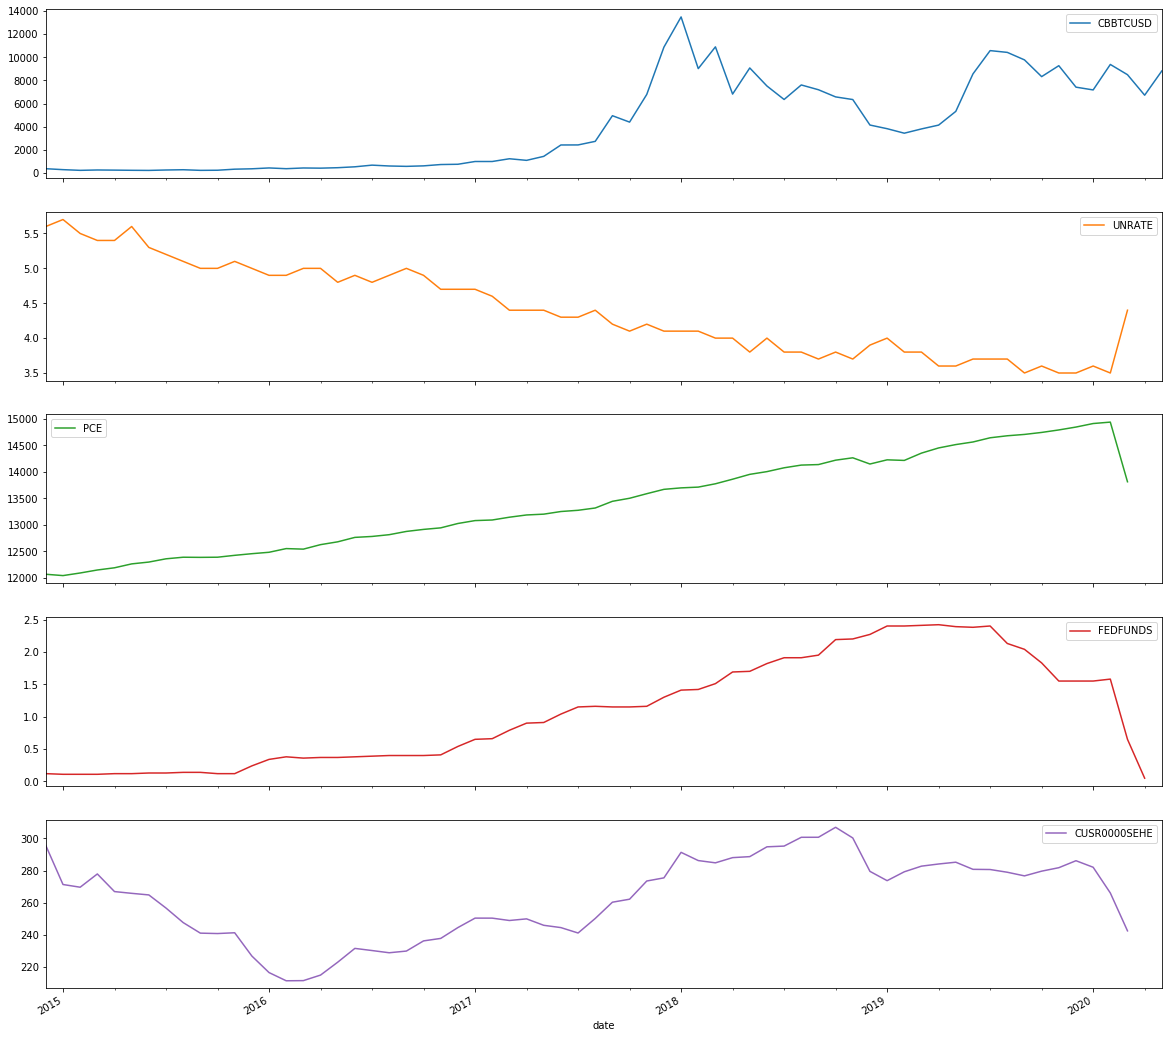

In [63]:
bit_monthly.plot(subplots = True, figsize = (20, 20))

In [78]:
bit_monthly.head()

,CBBTCUSD,UNRATE,PCE,FEDFUNDS,CUSR0000SEHE,bit_pct,pce_pct,fed_pct,pi_pct
date,,,,,,,,,
2014-12-01,370.00,5.6,12065.0,0.12,295.589,NaN,NaN,NaN,NaN
2015-01-01,288.99,5.7,12039.9,0.11,271.328,-0.218946,-0.002080,-0.083333,-0.082077
2015-02-01,228.99,5.5,12089.1,0.11,269.641,-0.207620,0.004086,0.000000,-0.006218
2015-03-01,260.24,5.4,12145.7,0.11,277.899,0.136469,0.004682,0.000000,0.030626
2015-04-01,247.87,5.4,12187.4,0.12,266.924,-0.047533,0.003433,0.090909,-0.039493


### Correlation

In [71]:
bit_monthly = bit_monthly.fillna(method = 'bfill')

In [75]:
bit_monthly['bit_pct'] = bit_monthly['CBBTCUSD'].pct_change()
bit_monthly['unrate_pct'] = bit_monthly['UNRATE'].pct_change()
bit_monthly['pce_pct'] = bit_monthly['PCE'].pct_change()
bit_monthly['fed_pct'] = bit_monthly['FEDFUNDS'].pct_change()
bit_monthly['pi_pct'] = bit_monthly['CUSR0000SEHE'].pct_change()

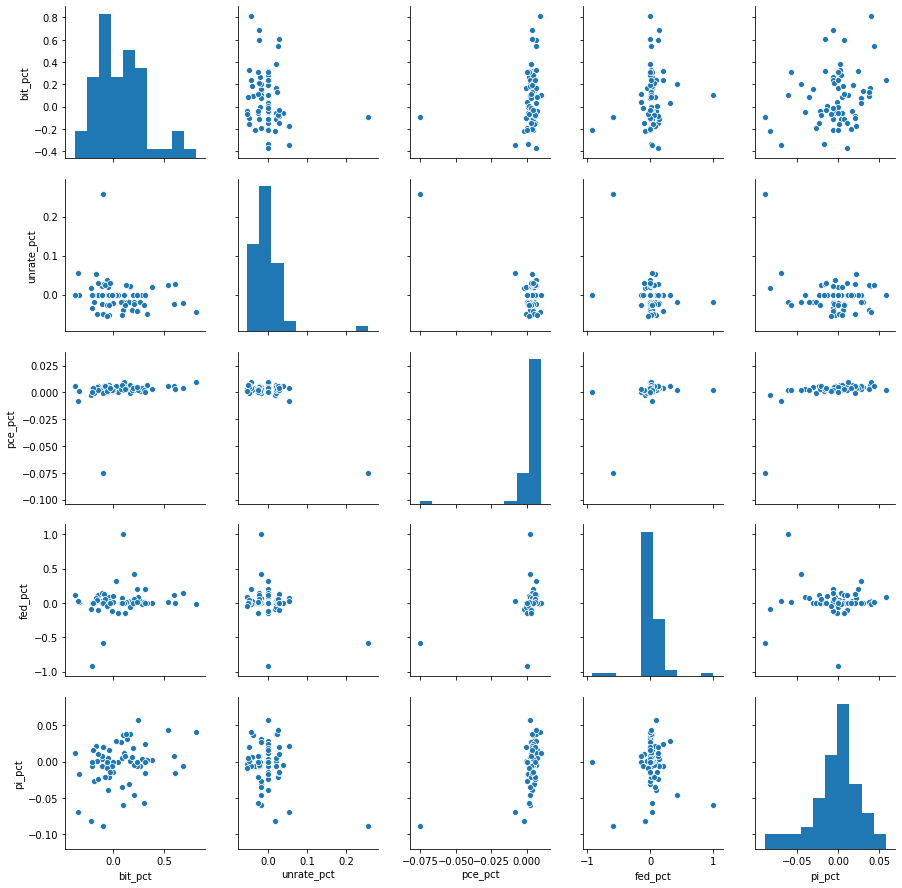

In [81]:
sns.pairplot(data = bit_monthly[['bit_pct', 'unrate_pct', 'pce_pct', 'fed_pct','pi_pct']])

In [83]:
bit_monthly.corr()

,CBBTCUSD,UNRATE,PCE,FEDFUNDS,CUSR0000SEHE,bit_pct,pce_pct,fed_pct,pi_pct,unrate_pct
CBBTCUSD,1.000000,-0.808323,0.821256,0.715309,0.671899,0.105557,-0.120235,-0.259316,0.101947,0.112077
UNRATE,-0.808323,1.000000,-0.973603,-0.921581,-0.577140,-0.071360,-0.026053,0.162940,-0.155435,0.038613
PCE,0.821256,-0.973603,1.000000,0.921260,0.616700,0.010670,-0.030592,-0.240886,0.097691,0.064346
FEDFUNDS,0.715309,-0.921581,0.921260,1.000000,0.695904,0.015467,0.093342,-0.022602,0.120753,-0.028518
CUSR0000SEHE,0.671899,-0.577140,0.616700,0.695904,1.000000,-0.119322,0.119094,-0.196814,0.128334,-0.075169
bit_pct,0.105557,-0.071360,0.010670,0.015467,-0.119322,1.000000,0.171885,0.163021,0.262051,-0.183096
pce_pct,-0.120235,-0.026053,-0.030592,0.093342,0.119094,0.171885,1.000000,0.397569,0.488794,-0.774472
fed_pct,-0.259316,0.162940,-0.240886,-0.022602,-0.196814,0.163021,0.397569,1.000000,-0.019257,-0.340242
pi_pct,0.101947,-0.155435,0.097691,0.120753,0.128334,0.262051,0.488794,-0.019257,1.000000,-0.318632
unrate_pct,0.112077,0.038613,0.064346,-0.028518,-0.075169,-0.183096,-0.774472,-0.340242,-0.318632,1.000000


Even after reducing the data to percentage change, bitcoin price still display weak to moderate correlation with PCE (personal Expendure Index), Fedfunds, and (PI) Peronal income index and unemployment.

In [103]:
# save the processed monthly date
bit_monthly.to_csv('bit_monthly.csv')

### Linear Regression

In [84]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats

In [98]:
mod = smf.ols(formula = 'bit_pct ~ pce_pct + fed_pct + pi_pct + unrate_pct', data = bit_monthly)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                bit_pct   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.805
Date:                Tue, 05 May 2020   Prob (F-statistic):              0.140
Time:                        16:55:28   Log-Likelihood:                 3.2529
No. Observations:                  65   AIC:                             3.494
Df Residuals:                      60   BIC:                             14.37
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0834      0.032      2.645      0.0

In [99]:
# evaluate the model
residuals = results.resid
fitted = results.fittedvalues
smoothed = lowess(residuals, fitted)
top5 = abs(residuals).sort_values(ascending = False)[:5]

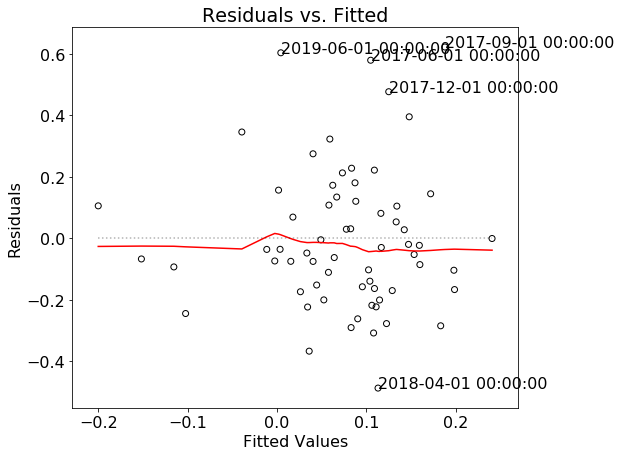

In [96]:
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top5.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

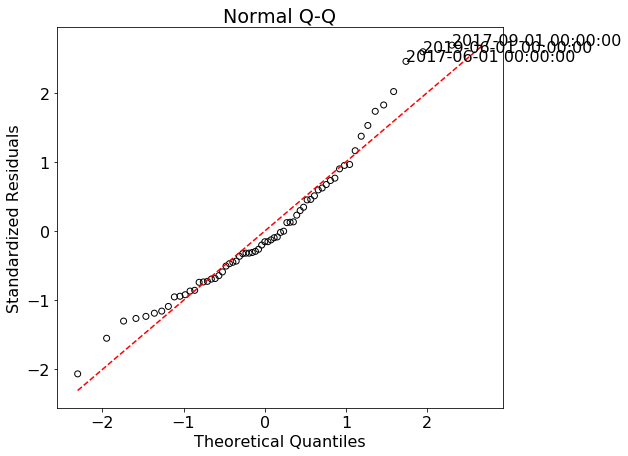

In [100]:
sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
sorted_student_residuals.index = results.resid.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()

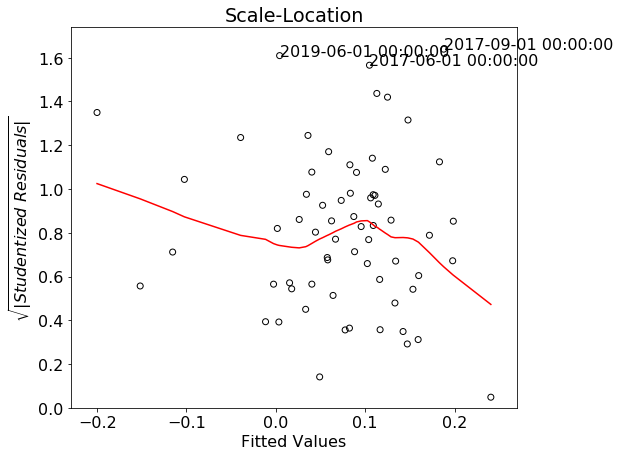

In [101]:
student_residuals = results.get_influence().resid_studentized_internal
sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
sqrt_student_residuals.index = results.resid.index
smoothed = lowess(sqrt_student_residuals,fitted)
top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

fig, ax = plt.subplots()
ax.scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')
ax.set_ylim(0,max(sqrt_student_residuals)+0.1)
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
plt.show()

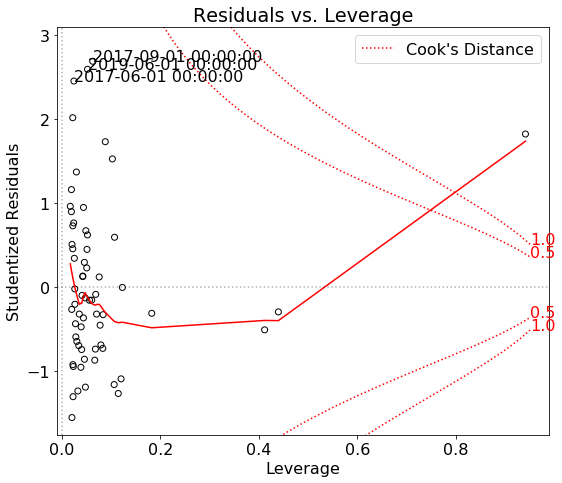

In [102]:
student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
student_residuals.index = results.resid.index
df = pd.DataFrame(student_residuals)
df.columns = ['student_residuals']
df['leverage'] = results.get_influence().hat_matrix_diag
smoothed = lowess(df['student_residuals'],df['leverage'])
sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
top3 = sorted_student_residuals[:3]

fig, ax = plt.subplots()
x = df['leverage']
y = df['student_residuals']
xpos = max(x)+max(x)*0.01  
ax.scatter(x, y, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Leverage')
ax.set_title('Residuals vs. Leverage')
ax.set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
ax.set_xlim(-0.01,max(x)+max(x)*0.05)
plt.tight_layout()
for val in top3.index:
    ax.annotate(val,xy=(x.loc[val],y.loc[val]))

cooksx = np.linspace(min(x), xpos, 50)
p = len(results.params)
poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

ax.plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks1y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
ax.plot([0,0],ax.get_ylim(), ls=":", alpha = .3, color = 'k')
ax.plot(ax.get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
ax.annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
ax.annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
ax.legend()
plt.show()

## NASDAQ and SP500

In [7]:
na = dpf('NASDAQCOM')

In [36]:
na.head()

,NASDAQCOM
date,
2014-12-01,4727.35
2014-12-02,4755.81
2014-12-03,4774.47
2014-12-04,4769.44
2014-12-05,4780.76


In [8]:
na = na.loc['2014-12-01':]

In [37]:
na.index.min(), na.index.max()

(Timestamp('2014-12-01 00:00:00'), Timestamp('2020-05-01 00:00:00'))

In [9]:
sp = dpf('SP500')

In [10]:
sp = sp.loc['2014-12-01':]

In [12]:
gold = dpf('GOLDAMGBD228NLBM')

In [17]:
gold.head()

,gold
date,
2014-12-01,1178.75
2014-12-02,1197.00
2014-12-03,1203.25
2014-12-04,1204.00
2014-12-05,1204.50


In [16]:
gold.columns = ['gold']
gold = gold.loc['2014-12-01':]

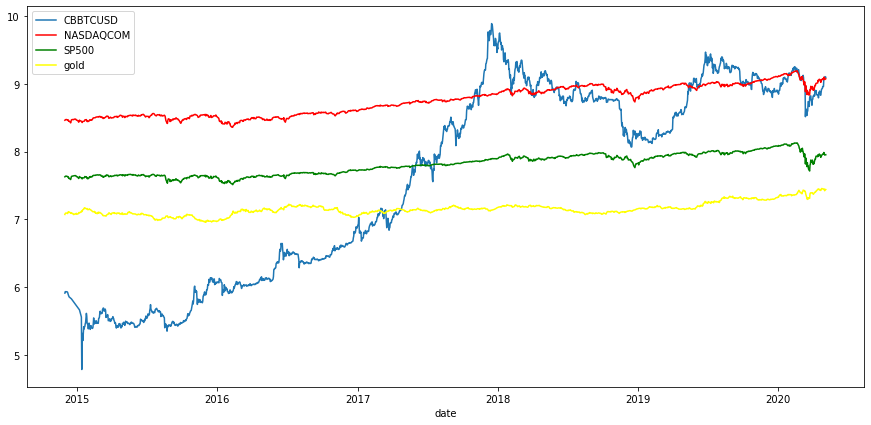

In [19]:
# Plot these original series on a log scale
plt.figure(figsize = (15, 7))
sns.lineplot(data = np.log(bit))
sns.lineplot(data = np.log(na), palette=['red'])
sns.lineplot(data = np.log(sp), palette=['green'])
sns.lineplot(data = np.log(gold), palette=['yellow'])


We can get the idea that although these three indexes are very different in terms of magtitude, there re a match in the peaks and valleys, and the upward trends.

In [22]:
bit_full = bit.join(na, how = 'left')
bit_full = bit_full.join(sp, how = 'left')
bit_full = bit_full.join(gold, how = 'left')

In [25]:
bit.head()

,CBBTCUSD,NASDAQCOM,SP500,gold,bit_pct,na_pct,sp_pct,gold_pct
date,,,,,,,,
2014-12-01,370.0,4727.35,2053.44,1178.75,NaN,NaN,NaN,NaN
2014-12-02,378.0,4755.81,2066.55,1197.00,0.021622,0.006020,0.006384,0.015483
2014-12-03,378.0,4774.47,2074.33,1203.25,0.000000,0.003924,0.003765,0.005221
2014-12-04,377.1,4769.44,2071.92,1204.00,-0.002381,-0.001054,-0.001162,0.000623
2014-12-06,378.0,NaN,NaN,NaN,0.002387,0.000000,0.000000,0.000000


In [24]:
bit['bit_pct'] = bit['CBBTCUSD'].pct_change()
bit['na_pct'] = bit['NASDAQCOM'].pct_change()
bit['sp_pct'] = bit['SP500'].pct_change()
bit['gold_pct'] = bit['gold'].pct_change()

/Users/liwenhuang/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/liwenhuang/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


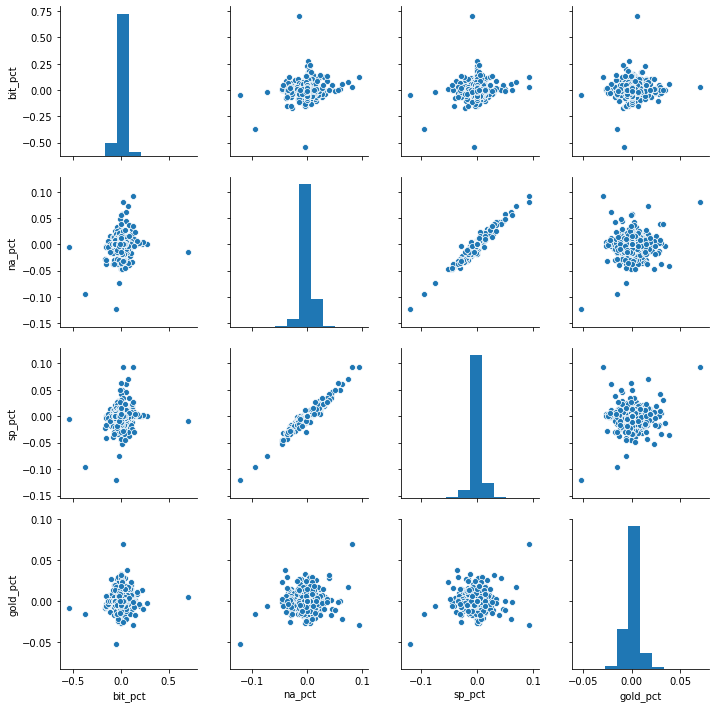

In [27]:
sns.pairplot(data = bit[['bit_pct', 'na_pct', 'sp_pct', 'gold_pct']])

In [28]:
bit.corr()

,CBBTCUSD,NASDAQCOM,SP500,gold,bit_pct,na_pct,sp_pct,gold_pct
CBBTCUSD,1.000000,0.836581,0.841652,0.606220,0.013689,0.010211,0.007901,0.029373
NASDAQCOM,0.836581,1.000000,0.990247,0.702138,0.006405,0.036081,0.028242,0.019736
SP500,0.841652,0.990247,1.000000,0.679182,0.001138,0.040690,0.036643,0.017454
gold,0.606220,0.702138,0.679182,1.000000,0.003786,0.027237,0.013326,0.079979
bit_pct,0.013689,0.006405,0.001138,0.003786,1.000000,0.101074,0.096681,0.053523
na_pct,0.010211,0.036081,0.040690,0.027237,0.101074,1.000000,0.959850,0.045846
sp_pct,0.007901,0.028242,0.036643,0.013326,0.096681,0.959850,1.000000,0.059387
gold_pct,0.029373,0.019736,0.017454,0.079979,0.053523,0.045846,0.059387,1.000000


We would see that although the original time series are highly correlated, but once we take a percentage changes, the correlation reduces drastically.